# 1.词向量简介

词向量（Word Embedding）是自然语言处理（NLP）中的一种技术，它将词语映射为实数向量空间中的点。这种映射捕获了词语的语义和上下文信息，使得每个词都可以用一个固定长度的向量来表示。词向量能够体现词语之间的相似性和关联性，例如，在向量空间中，语义相近的词其向量之间的距离也会比较近。

词向量可以用于：（1）捕捉语义和上下文关系:词向量可以捕获词语的语义信息，使得计算机可以理解和处理自然语言；（2）数值化表示：在机器学习中，模型的输入需要是数值化的形式；（3）词向量提供了一种将文本数据转换为数值数据的方式，便于使用算法进行处理；（4）提高模型性能：相比于传统的独热编码（One-Hot Encoding）等表示方法，词向量可以提供更加丰富和细腻的信息，有助于提高NLP任务的性能，如文本分类、情感分析等；（5）降低维度：自然语言中的词汇量巨大，词向量可以降低数据的维度，减少计算复杂度。词向量的使用包括三个部分：（1）训练：首先需要对大量文本进行训练，以生成词向量。常用的训练方法包括Word2vec和GloVe等；（2）加载和使用：训练完成后，将得到的词向量加载到模型中，作为输入特征；（3）应用：在NLP任务中，如文本分类、情感分析、机器翻译等，使用这些词向量作为特征。词向量的常用工具是Word2Vec，由Google开源的工具，包括两种训练模型，连续词袋（CBOW）和Skip-Gram；gensim：一个Python库，可以用来训练word2vec模型，并提供了丰富的API进行词向量的处理和分析。

# 2.【课程】词向量模型训练、相似性计算与可视化

## 2.1 样例数据准备

In [1]:
import pandas as pd
df = pd.read_excel('/Users/yangmi/Documents/text_analysis_ad.xlsx',index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [2]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/87/6c4tjldn0b9bqgff58m4gx540000gn/T/jieba.cache
Loading model cost 0.336 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [3]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


## 2.2 训练词向量模型

In [4]:
#调用gensim
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [5]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [6]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

## 2.3 获取词向量并计算余弦相似度

测量语义关联的一种方法是计算词向量的余弦相似度或距离，两个词向量在空间中夹角的余弦值，即余弦相似度(cosine similarity)，可以衡量两个词语之间的语义关联性(semanticrelatedness)，其本质上是这两个词的语用或上下文特征的相似性。余弦相似度取值范围是-1到1，但一般很少有负数;与之相反的是余弦距离(cosinedistance;1-余弦相似度)，取值范围是0到2。若两个词完全相关，则向量夹角为0余弦相似度为1，余弦距离为0;若两个词完全无关，则向量夹角为90°,余弦相似度为0.余弦距离为1。

In [7]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-0.88806283  1.1102297   0.49090567 -0.19751777 -0.44217932 -2.2545264
  0.91753995  2.9476292  -1.1473593  -1.2334641  -0.5023776  -2.0431883
 -0.20859407  1.1848831   0.6356543  -0.7175508   0.3901997  -0.59882665
 -0.15175039 -2.259537    1.0330393  -0.04840734  0.7000239  -0.68287694
 -0.10829064  0.21558091 -0.3679027  -0.9013515  -0.8978894  -0.19407167
  1.0342102   0.62108535  0.18572123 -0.8114599  -0.70579165  1.7071104
  0.6309291  -1.0705465  -1.198013   -2.361427    0.0647774  -0.5594207
 -0.16504872 -0.91206115  1.0741042  -0.85618246 -1.4211699   0.5315708
  1.3146561   0.68084466  0.26650685 -0.48441777 -0.8708186  -0.05340403
 -0.64610374  0.9354152   0.18018156  0.03915811 -0.66422987  0.40031487
  0.48620304  0.43201566 -0.30353078  0.47843507 -0.8880851   1.3201417
  0.19377056  0.89164275 -1.3969258   1.6101695  -0.72672755  1.3773347
  0.5558974  -0.22921498  1.6591064   0.36498728  0.09063344 -0.21271192
 -0.6205674   0.66528887 -0.48560175  0.25319913 -1.020

In [8]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.73187375
0.69785106
0.65248483
0.99365115
0.9895396
0.99401116


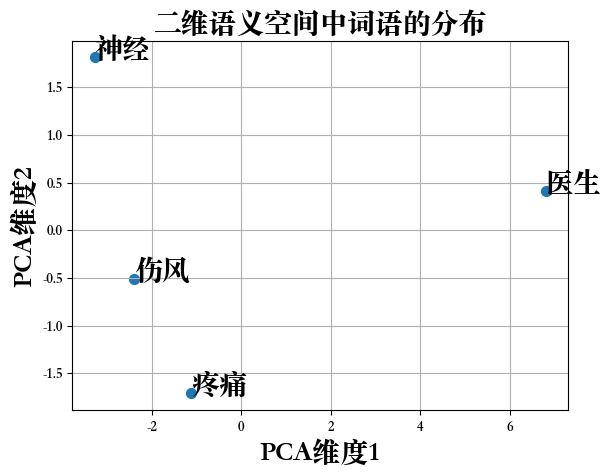

In [9]:
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
# mac系统与win系统不太一样，因此需要为matplotlib指定字体才能正常显示中文
# 指定字体文件
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'
prop = fm.FontProperties(fname=font_path)

# 使用指定字体绘图
plt.rcParams['font.sans-serif'] = [prop.get_name()]
plt.rcParams['axes.unicode_minus'] = False

# 绘图代码
words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=20)

plt.xlabel('PCA维度1', fontsize=20)
plt.ylabel('PCA维度2', fontsize=20)
plt.title('二维语义空间中词语的分布', fontsize=20)
plt.grid(True)
plt.show()


epoch指的是在训练过程中，数据迭代的次数，训练过程中当一个完整的数据集通过了模型一次并返回了一次，这个过程称为一个epoch。随着epoch的增加，模型的拟合程度也会发生变化。可以记录和打印训练过程中每次epoch的损失函数以查看模型的训练损失情况。

In [10]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 70007.28125
Loss after epoch 1: 78136.15625
Loss after epoch 2: 64915.046875
Loss after epoch 3: 62392.671875
Loss after epoch 4: 55269.34375
Loss after epoch 5: 51629.59375
Loss after epoch 6: 49540.6875
Loss after epoch 7: 47885.875
Loss after epoch 8: 46182.96875
Loss after epoch 9: 44741.9375
Loss after epoch 10: 43520.6875
Loss after epoch 11: 42176.5
Loss after epoch 12: 40725.3125
Loss after epoch 13: 39889.4375
Loss after epoch 14: 38658.125
Loss after epoch 15: 37602.25
Loss after epoch 16: 36349.375
Loss after epoch 17: 31523.5
Loss after epoch 18: 34411.0625
Loss after epoch 19: 33566.5
Loss after epoch 20: 32573.125
Loss after epoch 21: 31998.5
Loss after epoch 22: 31198.625
Loss after epoch 23: 29974.6875
Loss after epoch 24: 29525.625
Loss after epoch 25: 28736.625
Loss after epoch 26: 28086.625
Loss after epoch 27: 24912.5
Loss after epoch 28: 27301.875
Loss after epoch 29: 26500.125
Loss after epoch 30: 26109.5
Loss after epoch 31: 25728.875
Loss aft

# 3.【实战】豆瓣电影评论的词向量

## 3.1 豆瓣电影数据准备

In [13]:
comments = pd.read_csv('/Users/yangmi/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/60288368047cfe28c990d9f9875bf4e5/Message/MessageTemp/3e0bf5804df97da967a652c7dbc987b5/File/ratings.csv')
comments

,userId,movieId,rating,timestamp,comment,like
0,0,0,3,1431446400,连奥创都知道整容要去韩国。,2404
1,1,0,2,1429804800,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,2,0,2,1429977600,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,3,0,4,1429718400,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,4,0,2,1429632000,虽然从头打到尾，但是真的很无聊啊。,723
...,...,...,...,...,...,...
2125051,1670,27,4,1457193600,真好看 兔子警官又美有善良又可爱~简直理想结婚对象！每一个动物造型都是那么赞~,0
2125052,325967,27,5,1457107200,六星好评！像头脑特工队那样惊喜！,0
2125053,1088,27,4,1457625600,欢乐而又深刻，是童话故事更是政治寓言。,0
2125054,39769,27,5,1457107200,对现实世界歧视和偏见的影射妙哉妙哉，不要害怕打破常规，try everything,0


In [14]:
comments = comments.iloc[:10000]

In [15]:
import jieba
import re

In [16]:
#对微博内容进行清洗，去除标点符号、特殊字符、表情等,去除停用词、分词
def clean_text(text):
    text = re.sub(r'[^\u4e00-\u9fa5]+', '', text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[^\w\s]','',text)
    text = re.sub('\s+',' ',text)
    return text

In [18]:
comments['comment'] = comments['comment'].apply(clean_text)
comments['comment']

/var/folders/87/6c4tjldn0b9bqgff58m4gx540000gn/T/ipykernel_58667/3891728505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['comment'] = comments['comment'].apply(clean_text)


0                                            连奥创都知道整容要去韩国
1       非常失望剧本完全敷衍了事主线剧情没突破大家可以理解可所有的人物都缺乏动机正邪之间妇联内部都没...
2       年度最失望作品以为面面俱到实则画蛇添足以为主题深刻实则老调重弹以为推陈出新实则俗不可耐以为场...
3       铁人中勾引钢铁侠妇联中勾引鹰眼美队中勾引美国队长在妇联中终于跟绿巨人表白了黑寡妇用实际行动告...
4                                         虽然从头打到尾但是真的很无聊啊
                              ...                        
9995                       尾灯心里想反正我就要洗洗睡了所以就拍出来了一股洗洗睡了的感觉
9996                                                 审美疲劳
9997                        猩红女巫有时候看美得不可方物有几个角度看又像伏地魔怎么回事
9998                                     画面加分我是越来越对这种大片无感
9999    经历去年苦逼的一年我默默许下一个愿望那就是老子今年绝对不和表姐表弟们一起看电影了我要和妹纸看...
Name: comment, Length: 10000, dtype: object

In [19]:
#读取停用词列表
stopword_zh = [k.strip() for k in open('stopwords.txt', encoding='utf8').readlines() if k.strip() != '']

In [20]:
def dropstp_text(text):
    words = jieba.cut(text)
    words = [word for word in words if word not in stopword_zh]
    return  ' '.join(words)

In [21]:
comments['comment'] = comments['comment'].apply(dropstp_text)

/var/folders/87/6c4tjldn0b9bqgff58m4gx540000gn/T/ipykernel_58667/1457363986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['comment'] = comments['comment'].apply(dropstp_text)


In [22]:
comments['comment']

0                                                奥创 整容 韩国
1       失望 剧本 敷衍了事 主线 剧情 没 突破 理解 人物 缺乏 动机 正邪 妇联 内部 没什么...
2       年度 失望 作品 面面俱到 实则 画蛇添足 主题深刻 实则 老调重弹 推陈出新 实则 俗不可...
3       铁人 勾引 钢铁 侠 妇联 勾引 鹰眼 美队 勾引 美国 队长 妇联 终于 绿巨人 表白 黑...
4                                           从头 打到 尾 真的 无聊
                              ...                        
9995                         尾灯 想 反正 就要 洗洗 睡 拍 一股 洗洗 睡 感觉
9996                                                 审美疲劳
9997                       猩红 女巫 有时候 看美得 方物 几个 角度看 魔 怎么回事
9998                                      画面 加分 越来越 大片 无感
9999      经历 苦 逼 一年 默默 许下 一个 愿望 老子 表姐 表弟 电影 妹纸 电影 电影 电影 影
Name: comment, Length: 10000, dtype: object

## 3.2 训练词向量模型

In [23]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [24]:
from gensim.models import Word2Vec

corpus = comments['comment'].apply(lambda x: x.split()).tolist()
for document in corpus[:10]:
    print(document)

['奥创', '整容', '韩国']
['失望', '剧本', '敷衍了事', '主线', '剧情', '没', '突破', '理解', '人物', '缺乏', '动机', '正邪', '妇联', '内部', '没什么', '火花', '团结', '分裂', '团结', '三段式', '老套', '利用', '积攒', '形象', '魅力', '搞', '剧本', '写得', '肤浅', '平面', '场面', '调度', '混乱', '呆板', '满屏', '铁甲', '审美疲劳', '笑', '点算', '差强人意']
['年度', '失望', '作品', '面面俱到', '实则', '画蛇添足', '主题深刻', '实则', '老调重弹', '推陈出新', '实则', '俗不可耐', '场面', '实则', '劲', '气上', '一集', '趣味', '全无', '这集', '笑', '点', '刻意', '心虚', '全片', '片段', '紧张', '激动', '太弱', '奥创']
['铁人', '勾引', '钢铁', '侠', '妇联', '勾引', '鹰眼', '美队', '勾引', '美国', '队长', '妇联', '终于', '绿巨人', '表白', '黑寡妇', '实际行动', '告诉', '忠贞不二', '治疗', '不孕', '不育', '作战', '武器', '两支', '验孕', '棒', '快银', '死', '回来']
['从头', '打到', '尾', '真的', '无聊']
['剧情', '第一集', '好玩', '全靠', '密集', '笑点', '提神', '僧多粥少', '后果', '每部', '寡姐', '换', '队友', '谈恋爱', '这特', '打斗', '辛苦', '真心', '求', '放过', '结尾', '彩蛋', '洛基']
['一颗', '彩蛋', '降一星', '外加', '漫威', '编剧', '有心无力', '复仇者', '联盟', '只能', '永远', '着手', '团队', '东西', '重复', '第二次', '隔', '三年', '心有余而力不足', '只好', '三个', '新', '成员', '地有', '加', '一条', '家庭', '线', '妇联', '走', '赛车'

In [25]:
from gensim.models import Word2Vec
model = Word2Vec(corpus,
                 vector_size=100, 
                 window=5,
                 min_count=1)
model.save("word2vec.model")

In [29]:
word_list = model.wv.index_to_key
word_vectors = model.wv[word_list]

for word, vector in list(zip(word_list,word_vectors)):
    print(f'{word}:{vector}')


好:[-6.58123195e-02  8.31808746e-01  1.22707970e-01  1.54835001e-01
  7.27302162e-04 -1.27338755e+00  4.24868941e-01  1.85134661e+00
 -7.03840911e-01 -5.86003006e-01 -7.82527745e-01 -1.66936493e+00
 -1.71074688e-01  9.66539904e-02  4.02801931e-01 -7.34119952e-01
  1.83097124e-01 -1.49877369e+00 -9.68029201e-02 -1.69279671e+00
  6.77880168e-01  6.75887108e-01  2.15027258e-01 -5.45731604e-01
  1.78845182e-01  1.16549898e-02 -9.25612092e-01 -1.56613648e-01
 -1.01366150e+00 -3.39619890e-02  9.71848488e-01  2.29991674e-01
  1.03542484e-01 -7.64092982e-01 -3.81118834e-01  8.13576639e-01
  4.68229353e-01 -5.65286577e-01 -5.59240878e-01 -1.91919029e+00
 -1.22507498e-01 -1.26771641e+00 -8.17135051e-02  1.85350105e-01
  9.22685325e-01 -6.39908612e-01 -1.04629016e+00  1.06668413e-01
  3.99376929e-01  5.14038205e-01  7.55088568e-01 -1.01934540e+00
  9.98208448e-02 -5.33360422e-01 -6.00768626e-01  6.31358504e-01
  7.91829467e-01  2.09889367e-01 -1.34634256e+00  5.19245028e-01
  1.71042338e-01  1.992

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



不料:[-0.00720794  0.01443892 -0.00195878 -0.00076149 -0.00421266 -0.01325821
  0.0075846   0.00303862 -0.01091873 -0.00147651 -0.01193679 -0.00283
 -0.00240461 -0.00141095  0.00353014 -0.01149293 -0.00011665 -0.01673598
  0.00641051 -0.01759832 -0.00145584 -0.00290141  0.00552812  0.00118483
  0.00136425  0.00647412 -0.00238806 -0.01025554 -0.0114716   0.00477727
  0.01538938  0.00831489 -0.00124401 -0.00298122 -0.0082598   0.00247726
  0.005217    0.00153889 -0.00983152 -0.00980637  0.00136869 -0.01432265
  0.00724999  0.00368756  0.00873913 -0.00858455 -0.00841416  0.00886886
  0.0013581   0.00335915  0.00467716 -0.01212605 -0.00226077 -0.00484249
 -0.01403135 -0.00296773  0.01409783  0.00758906 -0.01473908  0.0034127
 -0.00133012  0.00818712 -0.00064167  0.00074232 -0.01421382 -0.00268038
 -0.00269655  0.00228228  0.001463    0.00286536  0.00566445 -0.00063796
  0.0114068   0.00384179  0.00101784 -0.00215011 -0.00701214 -0.00416835
 -0.01042406  0.00166471  0.00236368  0.00064325 -0.

## 3.3 计算词向量间相似度

In [30]:
print(model.wv.similarity('奥创','英雄'))
print(model.wv.similarity('奥创','烂片'))
print(model.wv.similarity('英雄','烂片'))
print(model.wv.similarity('英雄','热血'))
print(model.wv.similarity('烂片','热血'))
print(model.wv.similarity('奥创','热血'))

0.99585545
0.99874735
0.9965706
0.9956068
0.99849623
0.9991812


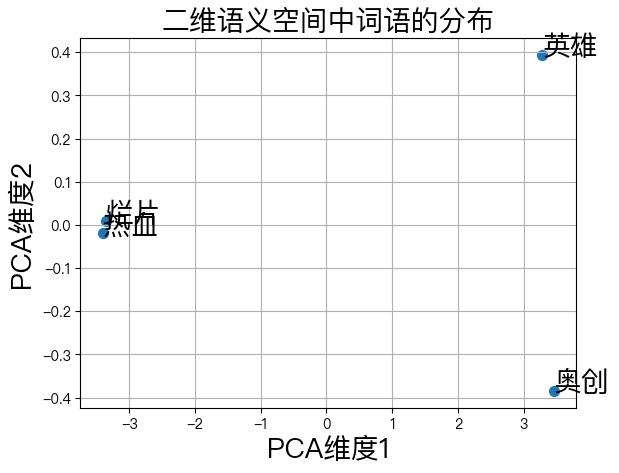

In [31]:
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
# mac系统与win系统不太一样，因此需要为matplotlib指定字体才能正常显示中文
# 指定字体文件
font_path = '/System/Library/Fonts/PingFang.ttc'
prop = fm.FontProperties(fname=font_path)

# 使用指定字体绘图
plt.rcParams['font.sans-serif'] = [prop.get_name()]
plt.rcParams['axes.unicode_minus'] = False

# 绘图代码
words = ['奥创', '英雄', '烂片', '热血']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=20)

plt.xlabel('PCA维度1', fontsize=20)
plt.ylabel('PCA维度2', fontsize=20)
plt.title('二维语义空间中词语的分布', fontsize=20)
plt.grid(True)
plt.show()

In [32]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 158427.296875
Loss after epoch 1: 149063.171875
Loss after epoch 2: 127478.90625
Loss after epoch 3: 116099.75
Loss after epoch 4: 110221.0
Loss after epoch 5: 106494.1875
Loss after epoch 6: 103103.4375
Loss after epoch 7: 100393.125
Loss after epoch 8: 97718.125
Loss after epoch 9: 95196.625
Loss after epoch 10: 93278.125
Loss after epoch 11: 91193.25
Loss after epoch 12: 89221.125
Loss after epoch 13: 87363.875
Loss after epoch 14: 85340.375
Loss after epoch 15: 83727.0
Loss after epoch 16: 82030.75
Loss after epoch 17: 80504.125
Loss after epoch 18: 78845.875
Loss after epoch 19: 77490.875
Loss after epoch 20: 75991.625
Loss after epoch 21: 72857.625
Loss after epoch 22: 71317.0
Loss after epoch 23: 69934.5
Loss after epoch 24: 68720.5
Loss after epoch 25: 67267.5
Loss after epoch 26: 66221.75
Loss after epoch 27: 64971.25
Loss after epoch 28: 64111.25
Loss after epoch 29: 63209.25
Loss after epoch 30: 62182.25
Loss after epoch 31: 61422.75
Loss after epoch 32: 